# 예측 모델 실습

### auto-mpg.csv 데이터를 통해,  
### mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon - 연비),

cylinders (실린더 갯수)

engine displacement (inches 배기량),

horsepower (마력),

vehicle weight (lbs. 무게),

time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간),

model year ,

origin of car (1. American,   2. European,   3. Japanese).

Also provided are the car labels (types)



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
df = pd.read_csv('../data/auto-mpg.csv')

In [8]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [11]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [12]:
y = df['mpg']

In [13]:
X = df.loc[ : , 'cyl' : 'origin' ]

In [14]:
X.head(3)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     392 non-null    int64  
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   yr      392 non-null    int64  
 6   origin  392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 21.6 KB


In [16]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [20]:
X_train.shape

(313, 7)

In [21]:
X_test.shape

(79, 7)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
X_test.head(3)

,cyl,displ,hp,weight,accel,yr,origin
388,4,97.0,52,2130,24.6,82,2
179,4,91.0,53,1795,17.5,75,3
292,4,86.0,65,1975,15.2,79,3


In [28]:
y_pred = regressor.predict(X_test)

In [29]:
y_pred

array([33.77637511, 32.03002602, 33.46916321, 16.46658529, 27.04246221,
       36.23268309, 21.84654564,  7.40882559, 24.30017362, 32.85068434,
       23.29907663, 11.48360071, 30.74519914, 24.20686942, 15.2416448 ,
       27.91866465, 30.92615813, 26.47153432, 29.81434677, 14.94740617,
       22.84369014, 23.6860258 , 18.84233189, 12.13696003, 24.39136642,
       26.04794718, 19.99742236, 21.17515858, 35.75628988, 32.75315201,
       26.7418266 , 34.39403901, 22.93639089, 10.971734  , 30.10291751,
       31.0906723 , 31.19541007, 26.75046042, 13.38573253, 20.31549299,
       23.59558341, 19.69359091, 29.26406708, 25.16933883, 29.00232429,
       14.88468425, 25.89330742, 23.260891  , 17.54134266, 23.33460275,
       17.99556829, 14.68236867, 33.36062646, 17.3473357 , 21.0875401 ,
       22.41629019, 11.80917877, 31.4780056 , 26.39413937, 28.36688952,
       19.07050311, 21.96364778, 25.97957503, 19.90336795, 10.83521095,
       16.01838471, 25.48087867, 12.75771163, 20.80404127, 26.71

In [30]:
y_test

388    44.0
179    33.0
292    34.1
211    13.0
19     26.0
       ... 
104    13.0
152    15.0
226    18.5
248    19.4
111    19.0
Name: mpg, Length: 79, dtype: float64

In [35]:
((y_test - y_pred) ** 2).mean()  #MSE

np.float64(12.440699176751943)

In [46]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [37]:
mean_squared_error(y_test, y_pred)

12.440699176751943

In [39]:
import math

In [40]:
math.sqrt(mean_squared_error(y_test, y_pred))

3.5271375330077426

In [43]:
root_mean_squared_error(y_test, y_pred)

3.5271375330077426

In [45]:
mean_absolute_error(y_test, y_pred)

2.5840040608985895

In [48]:
r2_score(y_test, y_pred) # 0~1 사이의 값으로 나오는데, 1로 나올 수록 성능이 좋다.

0.7893105393729918

In [52]:
df_test = y_test.to_frame().reset_index(drop=True)

In [58]:
df_test['y_pred'] = y_pred

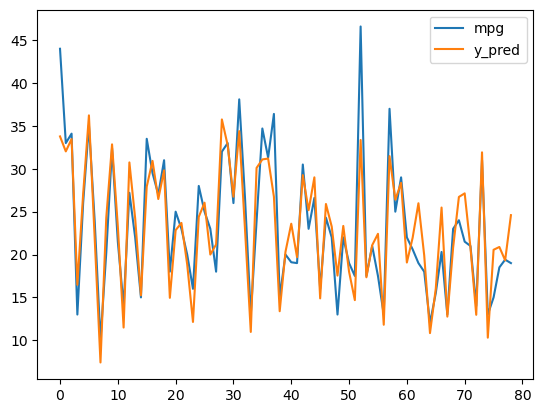

In [59]:
df_test.plot()
plt.show()

In [68]:
y_test.values

array([44. , 33. , 34.1, 13. , 26. , 35.1, 23.9, 10. , 20.2, 32.4, 21.5,
       14. , 27.2, 22. , 15. , 33.5, 29.5, 27. , 31. , 18. , 25. , 23. ,
       20. , 16. , 28. , 25. , 23. , 18. , 32. , 33. , 26. , 38.1, 26.6,
       13. , 23.9, 34.7, 31.3, 36.4, 15. , 20. , 19.1, 19. , 30.5, 23. ,
       26.6, 16. , 24.3, 22. , 13. , 22. , 19. , 17.5, 46.6, 17.5, 21. ,
       17.5, 13. , 37. , 25. , 29. , 22. , 20.6, 19. , 18. , 12. , 15.5,
       20.3, 13. , 23. , 24. , 21.5, 21. , 14. , 31. , 13. , 15. , 18.5,
       19.4, 19. ])

In [70]:
from koreanize_matplotlib import koreanize
koreanize()

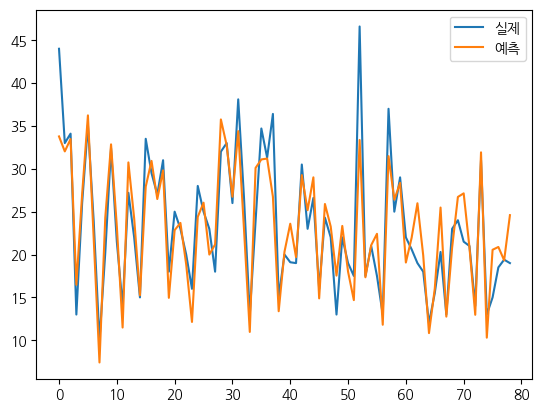

In [71]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['실제', '예측'])
plt.show()

In [74]:
df = pd.read_csv('../data/ecommerce.csv', index_col=0 )

In [75]:
df

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207
3,3,0,49,23621,23335,1,220
4,4,0,83,24431,27068,1,201
...,...,...,...,...,...,...,...
360,3,0,65,24232,24854,1,224
361,4,0,95,21161,21804,1,372
362,5,0,23,22293,23212,1,206
363,6,0,99,24797,25393,1,262


In [78]:
df['IsHoliday'].unique()

array([0, 1])

In [79]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [76]:
df.describe()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.991781,0.150685,54.030137,21989.027397,24136.219178,6.424658,232.358904
std,2.006155,0.358233,26.246542,1691.546551,2312.538599,3.492212,68.458136
min,0.000000,0.000000,10.000000,19003.000000,20038.000000,1.000000,61.000000
25%,1.000000,0.000000,32.000000,20673.000000,22322.000000,3.000000,191.000000
50%,3.000000,0.000000,55.000000,21872.000000,24150.000000,6.000000,225.000000
75%,5.000000,0.000000,76.000000,23422.000000,26097.000000,9.000000,279.000000
max,6.000000,1.000000,99.000000,24996.000000,27992.000000,12.000000,407.000000


### ★상관관계분석(correlation)  
두 변수(컬럼)가 어떤 선형적 관계(비례, 반비례)를 갖고있는지 분석  
상관계수 : -1(반비례)~1(비례), 0=관계업슨  
<small>[외우시긔]

In [82]:
df.corr()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
DayOfWeek,1.000000,-0.101485,-0.027126,0.058028,0.054830,-0.001853,-0.076832
IsHoliday,-0.101485,1.000000,0.007405,-0.042057,-0.034416,-0.009566,0.121911
MarketingSpend,-0.027126,0.007405,1.000000,0.024803,-0.041695,0.012718,0.582831
CompetitorPrice,0.058028,-0.042057,0.024803,1.000000,0.066226,0.033093,-0.297661
Price,0.054830,-0.034416,-0.041695,0.066226,1.000000,-0.078575,-0.703286
Month,-0.001853,-0.009566,0.012718,0.033093,-0.078575,1.000000,-0.185007
Sales,-0.076832,0.121911,0.582831,-0.297661,-0.703286,-0.185007,1.000000


In [84]:
df[['IsHoliday','MarketingSpend']].corr()

,IsHoliday,MarketingSpend
IsHoliday,1.000000,0.007405
MarketingSpend,0.007405,1.000000


In [86]:
df[ ['IsHoliday','Sales'] ].corr()

,IsHoliday,Sales
IsHoliday,1.000000,0.121911
Sales,0.121911,1.000000


In [87]:
df[ ['Price','CompetitorPrice','Sales'] ].corr()

,Price,CompetitorPrice,Sales
Price,1.000000,0.066226,-0.703286
CompetitorPrice,0.066226,1.000000,-0.297661
Sales,-0.703286,-0.297661,1.000000


In [88]:
# 파이차트? 퍼센테이지 나타내고 싶을 때

In [89]:
# 두 컬럼간의 관계? 스케터

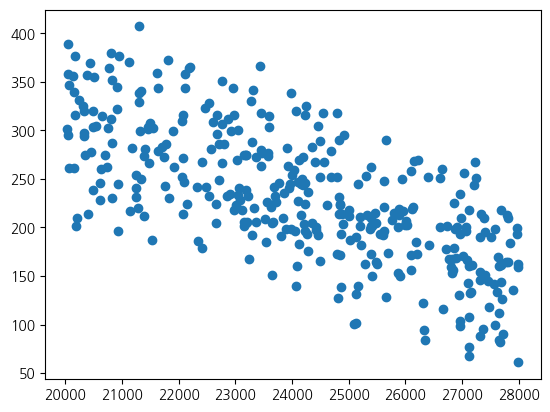

In [91]:
plt.scatter(data =df, x='Price', y='Sales')
plt.show()

In [94]:
df[['Price','Sales']].corr()

,Price,Sales
Price,1.000000,-0.703286
Sales,-0.703286,1.000000


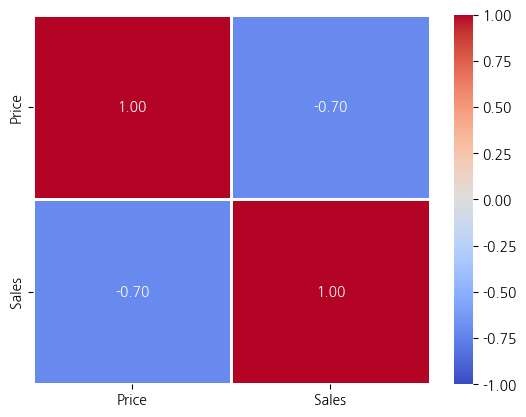

In [98]:
sb.heatmap(data= df[['Price','Sales']].corr(), linewidths=0.8, vmin=-1, vmax= 1, cmap='coolwarm',
          annot=True, fmt='.2f')
plt.show()

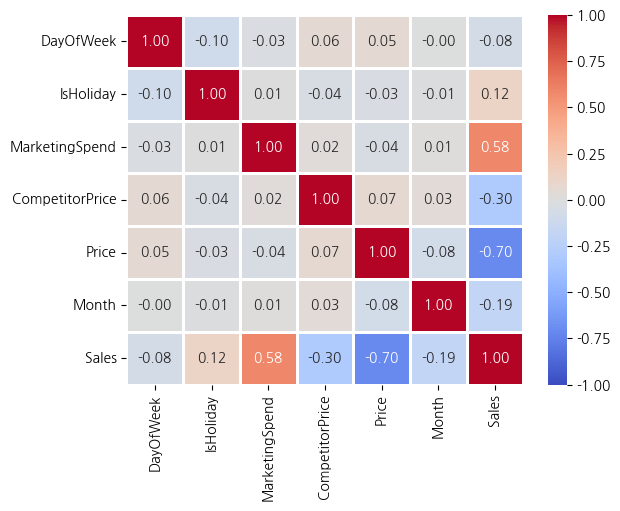

In [99]:
sb.heatmap(data= df.corr(), linewidths=0.8, vmin=-1, vmax= 1, cmap='coolwarm',
          annot=True, fmt='.2f')
plt.show()

#### 매출 예측하는 인공지능 만들기

In [109]:
df.isna().sum()

DayOfWeek          0
IsHoliday          0
MarketingSpend     0
CompetitorPrice    0
Price              0
Month              0
Sales              0
dtype: int64

In [110]:
df.head(3)

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207


In [111]:
y = df['Sales']

In [112]:
X = df.drop('Sales', axis = 1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [115]:
regressor = LinearRegression()

In [116]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [119]:
y_pred = regressor.predict(X_test)

In [120]:
y_pred

array([195.12002963, 310.49511662, 205.6803002 , 216.8041213 ,
       140.06206307, 252.14629705, 209.77387541, 312.72417214,
       224.78969725, 288.67618767, 278.65498872, 137.57168852,
       255.56700907, 380.85379852, 327.02828201, 220.94795245,
       193.35257925, 320.37883518, 198.5423998 , 152.4606588 ,
       215.50073224, 180.60694216, 286.59256277, 226.3424661 ,
       191.72164113, 308.37650298,  93.81570465, 302.46533644,
       247.74293986, 146.74035352, 160.530029  , 300.71724371,
       176.82270554,  66.28831408, 244.28408682, 258.59756397,
        83.36751113, 310.41488624, 233.16057841, 264.51536003,
       178.25559621, 238.88527182, 199.26827134, 233.27883966,
       252.46992497, 265.98117436, 211.33055869, 276.72640077,
       144.60607893, 296.97296896, 250.97669867, 231.02672474,
       255.79035432, 181.06628437, 141.96549013, 180.79623584,
       213.69095353, 235.31985072, 309.90585482, 164.12370447,
       142.66904684, 362.0122242 , 131.01606204, 333.11

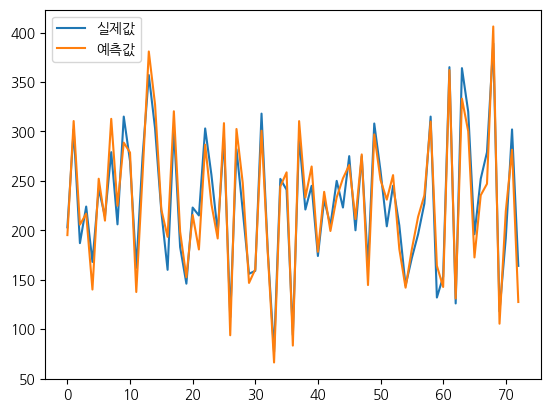

In [123]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['실제값','예측값'])
plt.show()

In [124]:
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
mean_squared_error(y_test,y_pred)

337.2756002975215

In [126]:
r2_score(y_test,y_pred)

0.9258699785535849

In [128]:
# 지금까지는 LinearRegression을 사용.
# 리그레션에 많이 사용하는 2가지 더 알아보자
# RandeomForest, XGBoost

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
regressor2 = RandomForestRegressor(n_estimators=500, random_state= 7)

In [150]:
regressor2.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [151]:
y_pred2 = regressor2.predict(X_test)

In [133]:
# 실제값과 리니어리그레션 예측값과 랜덤포레스트의 예측값을 전부 합쳐서 보자.

In [152]:
df_test = y_test.to_frame().reset_index(drop=True)

In [153]:
df_test['linear'] = y_pred

In [154]:
df_test['random'] = y_pred2

In [155]:
df_test

,Sales,linear,random
0,203,195.120030,205.504
1,302,310.495117,302.884
2,187,205.680300,210.818
3,224,216.804121,230.326
4,168,140.062063,202.924
...,...,...,...
68,389,406.143256,362.214
69,118,105.495257,111.644
70,192,219.123457,224.524
71,302,281.498499,255.972


In [156]:
# 리니어리그레션
mean_squared_error(y_test, y_pred)

337.2756002975215

In [157]:
# 랜덤포레스트
mean_squared_error(y_test, y_pred2)

483.0290815890411

In [158]:
r2_score(y_test, y_pred)

0.9258699785535849

In [159]:
r2_score(y_test, y_pred2)

0.8938347270130085

In [160]:
! pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 8.5 MB/s eta 0:00:07
   -- ------------------------------------- 3.4/56.8 MB 10.6 MB/s eta 0:00:06
   ---- ----------------------------------- 6.0/56.8 MB 11.2 MB/s eta 0:00:05
   ---- ----------------------------------- 7.1/56.8 MB 9.3 MB/s eta 0:00:06
   ----- ---------------------------------- 7.3/56.8 MB 7.7 MB/s eta 0:00:07
   ----- ---------------------------------- 7.3/56.8 MB 7.7 MB/s eta 0:00:07
   ----- ---------------------------------- 7.3/56.8 MB 7.7 MB/s eta 0:00:07
   ----- ---------------------------------- 8.1/56.8 MB 4.9 MB/s eta 0:00:10
   ------ --------------------------------- 8.9/56.8 MB 4.8 MB/s eta 0:00:10
   ------ --------------------------------- 9.7/56.8 MB 4.8 MB/s eta 0:00:10
   ------- -------------------------------- 11.0/56.8 MB 4.8 MB/s eta 0:00:10
   -------- ------------------------------- 12.1/56.8 MB 4.8 MB/s eta 0:00:10
  

In [161]:
from xgboost import XGBRFRegressor

In [191]:
regressor3 = XGBRFRegressor(n_estimators = 100, random_state=7)

In [192]:
regressor3.fit(X_train, y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [193]:
y_pred3 = regressor3.predict(X_test)

In [194]:
# 데이터프레임에 합쳐보자
df_test['xgboost'] = y_pred3

In [195]:
df_test

,Sales,linear,random,xgboost
0,203,195.120030,205.504,206.245743
1,302,310.495117,302.884,310.712738
2,187,205.680300,210.818,214.810318
3,224,216.804121,230.326,234.386810
4,168,140.062063,202.924,205.813477
...,...,...,...,...
68,389,406.143256,362.214,361.719177
69,118,105.495257,111.644,112.484062
70,192,219.123457,224.524,227.842499
71,302,281.498499,255.972,254.232635


In [196]:
mean_squared_error(y_test, y_pred)

337.2756002975215

In [197]:
mean_squared_error(y_test, y_pred2)

483.0290815890411

In [198]:
mean_squared_error(y_test, y_pred3)

515.8264770507812

In [199]:
r2_score(y_test, y_pred)

0.9258699785535849

In [200]:
r2_score(y_test, y_pred2)

0.8938347270130085

In [201]:
r2_score(y_test, y_pred3)

0.8866261839866638

파이프라이닝, 그리드서치

In [204]:
df = pd.read_csv('../data/healthcare.csv', index_col= 0)

In [205]:
df.head()

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
0,51.0,Female,NaN,South,No,19.0,70.081987
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
2,14.0,Male,NaN,North,No,8.0,46.794138
3,NaN,Female,27.020924,West,No,7.0,44.789132
4,60.0,Male,37.961368,North,No,16.0,71.790344


In [207]:
df.isna().sum()

Age               30
Gender             0
BMI               50
Region             0
Smoker             0
NumVisits         20
InsuranceClaim     0
dtype: int64

In [230]:
df.dropna(inplace=True)

In [231]:
df.isna().sum()

Age               0
Gender            0
BMI               0
Region            0
Smoker            0
NumVisits         0
InsuranceClaim    0
dtype: int64

In [232]:
df.shape

(407, 7)

In [233]:
df.head()

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
4,60.0,Male,37.961368,North,No,16.0,71.790344
5,20.0,Female,29.676706,East,No,1.0,39.417650
6,82.0,Male,15.821167,North,No,2.0,57.164211
7,86.0,Male,37.818737,East,No,7.0,70.191544


In [234]:
y = df['InsuranceClaim']

In [237]:
X = df.drop('InsuranceClaim',axis = 1)

In [238]:
X.head(3)

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0
5,20.0,Female,29.676706,East,No,1.0


In [240]:
sorted(df['Gender'].unique())

['Female', 'Male']

In [241]:
sorted(df['Region'].unique())

['East', 'North', 'South', 'West']

In [245]:
sorted(df['Smoker'].unique())

['No', 'Yes']

In [246]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [247]:
from sklearn.compose import ColumnTransformer

In [248]:
ct = ColumnTransformer( [ ('onehot', OneHotEncoder(), [3]),
                          ('label', OrdinalEncoder(), [1, 4]),
                          ('scaler', MinMaxScaler(), [0, 2, 5])] )

In [250]:
X_scaled = ct.fit_transform(X)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

In [252]:
regressor = LinearRegression()

In [254]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [256]:
y_pred = regressor.predict(X_test)

In [257]:
r2_score(y_test, y_pred)

0.8135291706001964

파이프라이닝

In [259]:
from sklearn.pipeline import Pipeline

In [261]:
pipe = Pipeline( steps= [ ("preprocessing", ct),
                          ("regressor", regressor) ] )

In [275]:
X.head(2)

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0


In [276]:
y.head(2)

1    92.747518
4    71.790344
Name: InsuranceClaim, dtype: float64

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [278]:
X_train.head(2)

,Age,Gender,BMI,Region,Smoker,NumVisits
435,14.0,Female,23.148137,South,No,16.0
123,4.0,Male,21.662460,West,No,1.0


In [279]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('label', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [280]:
y_pred = pipe.predict(X_test)

In [281]:
y_pred

array([60.48179805, 63.44516252, 70.611469  , 75.50964392, 53.63202614,
       75.92428158, 68.23389507, 60.745702  , 57.88668667, 77.3705967 ,
       62.32608181, 48.07742276, 72.88405212, 58.57231464, 73.48760367,
       54.7762362 , 64.18756789, 34.58433538, 48.10909232, 52.75001431,
       62.85027794, 56.5074751 , 56.82426901, 64.14919401, 59.0861962 ,
       79.7081743 , 63.23824524, 66.16196108, 86.89309729, 50.84820087,
       51.46942912, 83.65905403, 47.35463392, 56.30942085, 59.36965568,
       66.29350362, 45.91499134, 59.82016783, 69.97794308, 50.9048794 ,
       50.0260105 , 74.82448634, 60.18005206, 60.80523452, 61.73678859,
       45.86720029, 74.87528696, 62.71868922, 73.6312923 , 42.41557012,
       61.43212545, 58.87826111, 39.776723  , 50.00651981, 51.54248203,
       71.51084195, 56.33379702, 69.57272917, 69.37206007, 70.10244501,
       78.16562373, 40.30721566, 81.29297702, 55.47194826, 74.71648172,
       83.37170417, 52.45509128, 50.98171809, 53.66206206, 65.75

In [282]:
import joblib

In [283]:
joblib.dump(pipe, 'pipe.pkl')

['pipe.pkl']

In [284]:
pipe2 = joblib.load('pipe.pkl')

새로운 사람의 데이터가 있을 때, 보험금 수령액을 예측하려 한다.  
나이는 45세 남자이고, BMI는 28.5, 지역은 South에 살고, 담배를 피며 연간 병원 방문 횟수는 12회

In [285]:
data = [ { 'Age':45, 'Gender':'Male', 'BMI':28.5, 'Region':'South', 'Smoker':'Yes', 'NumVisits':12 } ]

In [286]:
new_data = pd.DataFrame(data)

In [287]:
new_data

,Age,Gender,BMI,Region,Smoker,NumVisits
0,45,Male,28.5,South,Yes,12


In [288]:
pipe2.predict(new_data)

array([69.93560068])

In [298]:
from sklearn.ensemble import RandomForestRegressor

그리드 서치를 적용grid search

In [299]:
regressor2 = RandomForestRegressor(random_state=7)

In [300]:
pipe = Pipeline([('preprocessing', ct),
               ('regressor2', regressor2)])

In [302]:
param_grid = { 'regressor2__n_estimators' : [ 50, 100, 200, 300, 400 ] ,
               'regressor2__max_depth' : [None, 10, 20, 30],
               'regressor2__min_samples_split' : [2, 5, 10],
               'regressor2__min_samples_leaf' : [1, 2, 4]}

In [303]:
from sklearn.model_selection import GridSearchCV

In [304]:
grid_search = GridSearchCV( pipe, param_grid, scoring='neg_mean_squared_error', cv=10, 
                          verbose = 2 )

In [305]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None

,estimator,Pipeline(step...om_state=7))])
,param_grid,"{'regressor2__max_depth': [None, 10, ...], 'regressor2__min_samples_leaf': [1, 2, ...], 'regressor2__min_samples_split': [2, 5, ...], 'regressor2__n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...), ('label', ...), ...]"


최적의 파라미터와 성능을 확인하자.

In [306]:
grid_search.best_params_

{'regressor2__max_depth': None,
 'regressor2__min_samples_leaf': 1,
 'regressor2__min_samples_split': 5,
 'regressor2__n_estimators': 200}

In [307]:
grid_search.best_score_

np.float64(-35.60737354182028)

In [308]:
best_regressor = grid_search.best_estimator_

In [309]:
y_pred = best_regressor.predict(X_test)

In [310]:
mean_squared_error(y_test, y_pred)

39.15094273812503

In [311]:
r2_score(y_test, y_pred)

0.7568406663080303

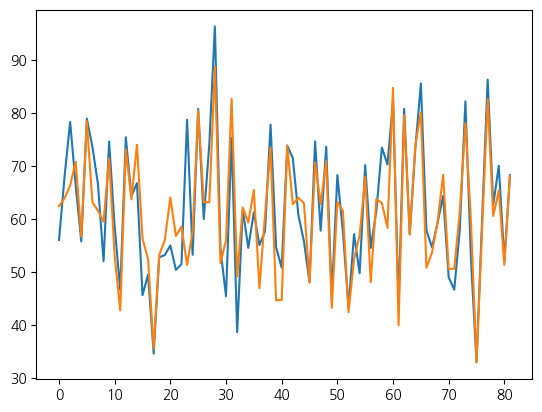

In [312]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.show()

리그레션문제는, 리니어리그레션, 랜덤포레스트, XG부스트 를 이용하면 된다.